In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dataset
data = pd.read_csv('delhivery_data.csv')
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [3]:
# Checking the row and column count.
data.shape

(144867, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
# Converting the below columns from object data type to datetime data type
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [6]:
data.describe()

trip_creation_time                  od_start_time  \
count                         144867                         144867   
mean   2018-09-22 13:34:23.659819264  2018-09-22 18:02:45.855230720   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 03:20:51.775845888  2018-09-17 08:05:40.886155008   
50%    2018-09-22 04:24:27.932764928  2018-09-22 08:53:00.116656128   
75%    2018-09-27 17:57:56.350054912  2018-09-27 22:41:50.285857024   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  cutoff_factor  \
count                         144867           144867.000000  144867.000000   
mean   2018-09-23 10:04:31.395393024              961.262986     232.926567   
min       2018-09-12 00:50:10.814399               20.000000       9.000000   
25%    2018-09-18 01:48:06.410121984              161.000000      22.000000   
50%    2018-09-23 03:13:03.520212992              449.000000      66.000000   
75%    2018-09-28 12:49:06.054018048             1634.000000     286.000000   
max       2018-10-08 03:00:24.353479             7898.000000    1927.000000   
std                              NaN             1037.012769     344.755577   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   144867.000000  144867.000000  144867.000000   
mean                       234.073372     416.927527     213.868272   
min                          9.000045       9.000000       6.000000   
25%                         23.355874      51.000000      27.000000   
50%                         66.126571     132.000000      64.000000   
75%                        286.708875     513.000000     257.000000   
max                       1927.447705    4532.000000    1686.000000   
std                        344.990009     598.103621     308.011085   

       osrm_distance         factor  segment_actual_time  segment_osrm_time  \
count  144867.000000  144867.000000        144867.000000      144867.000000   
mean      284.771297       2.120107            36.196111          18.507548   
min         9.008200       0.144000          -244.000000           0.000000   
25%        29.914700       1.604264            20.000000          11.000000   
50%        78.525800       1.857143            29.000000          17.000000   
75%       343.193250       2.213483            40.000000          22.000000   
max      2326.199100      77.387097          3051.000000        1611.000000   
std       421.119294       1.715421            53.571158          14.775960   

       segment_osrm_distance  segment_factor  
count           144867.00000   144867.000000  
mean                22.82902        2.218368  
min                  0.00000      -23.444444  
25%                 12.07010        1.347826  
50%                 23.51300        1.684211  
75%                 27.81325        2.250000  
max               2191.40370      574.250000  
std                 17.86066        4.847530

In [7]:
data.describe(include=['object'])

data                                route_schedule_uuid  \
count     144867                                             144867   
unique         2                                               1504   
top     training  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
freq      104858                                               1812   

       route_type                trip_uuid source_center  \
count      144867                   144867        144867   
unique          2                    14817          1508   
top           FTL  trip-153811219535896559  IND000000ACB   
freq        99660                      101         23347   

                          source_name destination_center  \
count                          144574             144867   
unique                           1498               1481   
top     Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
freq                            23347              15192   

                     destination_name     cutoff_timestamp  
count                          144606               144867  
unique                           1468                93180  
top     Gurgaon_Bilaspur_HB (Haryana)  2018-09-24 05:19:20  
freq                            15192                   40

In [8]:
# Fetching the categorical columns 
cat_cols = data.dtypes == 'object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'cutoff_timestamp']

In [9]:
# Creating a new column segment_key as a unique indentifier.
data['segment_key'] = data['trip_uuid'].str.slice(16,23) + data['source_center'] + data['destination_center']
data.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ... actual_distance_to_destination  actual_time  \
0 2018-09-20 03:21:32.418600  ...                      10.435660         14.0   
1 2018-09-20 03:21:32.418600  ...                      18.936842         24.0   
2 2018-09-20 03:21:32.418600  ...                      27.637279         40.0   
3 2018-09-20 03:21:32.418600  ...                      36.118028         62.0   
4 2018-09-20 03:21:32.418600  ...                      39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor                      segment_key  
0                11.9653        1.272727  7649320IND388121AAAIND388620AAB  
1                 9.7590        1.111111  7649320IND388121AAAIND388620AAB  
2                10.8152        2.285714  7649320IND388121AAAIND388620AAB  
3                13.0224        1.750000  7649320IND388121AAAIND388620AAB  
4                 3.9153        1.200000  7649320IND388121AAAIND388620AAB  

[5 rows x 25 columns]

In [10]:
# We're grouping the data by segment_key and calculating the respective columns cummulative sum.
data['segment_actual_time_sum'] = data.groupby('segment_key')['segment_actual_time'].cumsum()
data['segment_osrm_distance_sum'] = data.groupby('segment_key')['segment_osrm_distance'].cumsum()
data['segment_osrm_time_sum'] = data.groupby('segment_key')['segment_osrm_time'].cumsum()

In [11]:
data.head(20)

data         trip_creation_time  \
0   training 2018-09-20 02:35:36.476840   
1   training 2018-09-20 02:35:36.476840   
2   training 2018-09-20 02:35:36.476840   
3   training 2018-09-20 02:35:36.476840   
4   training 2018-09-20 02:35:36.476840   
5   training 2018-09-20 02:35:36.476840   
6   training 2018-09-20 02:35:36.476840   
7   training 2018-09-20 02:35:36.476840   
8   training 2018-09-20 02:35:36.476840   
9   training 2018-09-20 02:35:36.476840   
10  training 2018-09-23 06:42:06.021680   
11  training 2018-09-23 06:42:06.021680   
12  training 2018-09-23 06:42:06.021680   
13  training 2018-09-23 06:42:06.021680   
14  training 2018-09-23 06:42:06.021680   
15  training 2018-09-14 15:42:46.437249   
16  training 2018-09-14 15:42:46.437249   
17  training 2018-09-13 20:44:19.424489   
18  training 2018-09-13 20:44:19.424489   
19  training 2018-09-13 20:44:19.424489   

                                  route_schedule_uuid route_type  \
0   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
10  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
11  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
12  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
13  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
14  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
15  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
16  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
17  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
18  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
19  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   

                  trip_uuid source_center                        source_name  \
0   trip-153741093647649320  IND388121AAA         Anand_VUNagar_DC (Gujarat)   
1   trip-153741093647649320  IND388121AAA         Anand_VUNagar_DC (Gujarat)   
2   trip-153741093647649320  IND388121AAA         Anand_VUNagar_DC (Gujarat)   
3   trip-153741093647649320  IND388121AAA         Anand_VUNagar_DC (Gujarat)   
4   trip-153741093647649320  IND388121AAA         Anand_VUNagar_DC (Gujarat)   
5   trip-153741093647649320  IND388620AAB      Khambhat_MotvdDPP_D (Gujarat)   
6   trip-153741093647649320  IND388620AAB      Khambhat_MotvdDPP_D (Gujarat)   
7   trip-153741093647649320  IND388620AAB      Khambhat_MotvdDPP_D (Gujarat)   
8   trip-153741093647649320  IND388620AAB      Khambhat_MotvdDPP_D (Gujarat)   
9   trip-153741093647649320  IND388620AAB      Khambhat_MotvdDPP_D (Gujarat)   
10  trip-153768492602129387  IND421302AAG  Bhiwandi_Mankoli_HB (Maharashtra)   
11  trip-153768492602129387  IND421302AAG  Bhiwandi_Mankoli_HB (Maharashtra)   
12  trip-153768492602129387  IND421302AAG  Bhiwandi_Mankoli_HB (Maharashtra)   
13  trip-153768492602129387  IND421302AAG  Bhiwandi_Mankoli_HB (Maharashtra)   
14  trip-153768492602129387  IND421302AAG  Bhiwandi_Mankoli_HB (Maharashtra)   
15  trip-153693976643699843  IND400011AAA        LowerParel_CP (Maharashtra)   
16  trip-153693976643699843  IND400011AAA        LowerParel_CP (Maharashtra)   
17  trip-153687145942424248  IND562132AAA   Bangalore_Nelmngla_H (Karnataka)   
18  trip-153687145942424248  IND562132AAA   Bangalore_Nelmngla_H (Karnataka)   
19  trip-153687145942424248  IND560099AAB  Bengaluru_Bomsndra_HB (Karnataka

In [12]:
data[data['segment_key'] == '0000193IND360510AABIND360530AAB']

data         trip_creation_time  \
107441  training 2018-09-22 01:43:50.600327   
107442  training 2018-09-22 01:43:50.600327   
107443  training 2018-09-22 01:43:50.600327   

                                      route_schedule_uuid route_type  \
107441  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
107442  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
107443  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   

                      trip_uuid source_center                   source_name  \
107441  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
107442  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
107443  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   

       destination_center              destination_name  \
107441       IND360530AAB  Jamjodhpur_Court_D (Gujarat)   
107442       IND360530AAB  Jamjodhpur_Court_D (Gujarat)   
107443       IND360530AAB  Jamjodhpur_Court_D (Gujarat)   

                    od_start_time  ... osrm_distance    factor  \
107441 2018-09-22 05:42:00.425158  ...        9.9597  1.111111   
107442 2018-09-22 05:42:00.425158  ...       23.2322  0.952381   
107443 2018-09-22 05:42:00.425158  ...       26.7412  1.250000   

        segment_actual_time  segment_osrm_time segment_osrm_distance  \
107441                 10.0                9.0                9.9597   
107442                 10.0               12.0               13.2726   
107443                  9.0                3.0                3.5090   

        segment_factor                      segment_key  \
107441        1.111111  0000193IND360510AABIND360530AAB   
107442        0.833333  0000193IND360510AABIND360530AAB   
107443        3.000000  0000193IND360510AABIND360530AAB   

        segment_actual_time_sum  segment_osrm_distance_sum  \
107441                     10.0                     9.9597   
107442                     20.0                    23.2323   
107443                     29.0                    26.7413   

        segment_osrm_time_sum  
107441                    9.0  
107442                   21.0  
107443                   24.0  

[3 rows x 28 columns]

In [13]:
# Creating a dictionary with key as column names and value as the aggregated methods.
create_segment_dict = {'segment_actual_time_sum':'sum',
                       'segment_osrm_distance_sum' : 'sum',
                       'segment_osrm_time_sum' : 'sum',
                       'actual_distance_to_destination' : 'first',
                       'start_scan_to_end_scan' : 'first',
                       'osrm_time' : 'mean',
                       'actual_time':'mean',
                       'segment_actual_time':'mean',
                       'osrm_distance' : 'mean',
                       'segment_osrm_distance':'mean',
                       'segment_osrm_time':'mean',
                       'source_name':'last',
                       'destination_name':'last'
                      }

In [14]:
# grouping the data with segment_key and aggregation operations on the different segment of each trip will be performed.
result = data.groupby('segment_key').agg(create_segment_dict).reset_index()
result

segment_key  segment_actual_time_sum  \
0      0000193IND360510AABIND360530AAB                     59.0   
1      0000193IND360530AABIND362001AAA                    469.0   
2      0000193IND362001AAAIND360575AAA                    594.0   
3      0000455IND110037AAMIND110085AAB                     78.0   
4      0001952IND140901AAAIND160055AAA                     45.0   
...                                ...                      ...   
26363  9999057IND802119AAAIND802158AAB                    119.0   
26364  9999912IND261001AAAIND262701AAA                    220.0   
26365  9999912IND261201AABIND261001AAA                    105.0   
26366  9999912IND262701AAAIND262802AAA                     83.0   
26367  9999912IND262802AAAIND262723AAB                    419.0   

       segment_osrm_distance_sum  segment_osrm_time_sum  \
0                        59.9333                   54.0   
1                       359.8473                  302.0   
2                       639.5647                  470.0   
3                        35.9153                   39.0   
4                        24.9243                   26.0   
...                          ...                    ...   
26363                   109.5905                   92.0   
26364                   141.0378                  127.0   
26365                    63.1227                   54.0   
26366                    55.6160                   38.0   
26367                   210.1194                  158.0   

       actual_distance_to_destination  start_scan_to_end_scan  osrm_time  \
0                            9.057828                    48.0  18.000000   
1                            9.399352                   132.0  42.428571   
2                            9.451548                   127.0  47.900000   
3                           11.030601                   246.0  19.500000   
4                            9.006549                    52.0  13.000000   
...                               ...                     ...        ...   
26363                       22.408819                   108.0  37.500000   
26364                       22.218589                   132.0  38.333333   
26365                       22.968823                   112.0  27.000000   
26366                       22.482969                    88.0  19.000000   
26367                       22.976607                   219.0  53.000000   

       actual_time  segment_actual_time  osrm_distance  segment_osrm_distance  \
0        20.000000             9.666667      19.977700               8.913767   
1        68.571429            15.714286      49.643671              11.760329   
2        62.200000            10.700000      61.136270              10.958110   
3        39.000000            26.000000      17.957650              11.103500   
4        23.000000            12.000000      12.462200               7.135550   
...            ...                  ...            ...                    ...   
26363    59.500000            33.500000      49.284100              31.454100   
26364    74.000000            34.333333      42.306933              21.391833   
26365    52.500000            31.500000      31.561350              18.580850   
26366    42.000000            25.000000      27.808050              15.975650   
26367   140.000000            61.000000      70.039800              30.817233   

       segment_osrm_time                          source_name  \
0               8.000000         Bhanvad_Mainroad_D (Gujarat)   
1              10.000000         Jamjodhpur_Court_D (Gujarat)   
2               8.300000               Junagadh_DPC (Gujarat)   
3              12.500000              Delhi_Airport_H (Delhi)   
4               7.500000  Chandigarh_Mullanpr_DC (Chandigarh)   
...                  ...                                  ...   
26363          27.000000           Dumraon_Nishangr_D (Bihar)   
26364          19.000000      Sitapur_Chowk_D (Uttar Pradesh)   
26365          16.000000    Biswan_PatelNG

In [15]:
# Sorting the dataset first on the segment_key and end by od_end_time
data = data.sort_values(by=['segment_key','od_end_time'])
data

data         trip_creation_time  \
107441  training 2018-09-22 01:43:50.600327   
107442  training 2018-09-22 01:43:50.600327   
107443  training 2018-09-22 01:43:50.600327   
107444  training 2018-09-22 01:43:50.600327   
107445  training 2018-09-22 01:43:50.600327   
...          ...                        ...   
39918       test 2018-10-02 23:27:39.400247   
39919       test 2018-10-02 23:27:39.400247   
39920       test 2018-10-02 23:27:39.400247   
39921       test 2018-10-02 23:27:39.400247   
39922       test 2018-10-02 23:27:39.400247   

                                      route_schedule_uuid route_type  \
107441  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
107442  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
107443  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
107444  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
107445  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
...                                                   ...        ...   
39918   thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
39919   thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
39920   thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
39921   thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
39922   thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   

                      trip_uuid source_center  \
107441  trip-153758063060000193  IND360510AAB   
107442  trip-153758063060000193  IND360510AAB   
107443  trip-153758063060000193  IND360510AAB   
107444  trip-153758063060000193  IND360530AAB   
107445  trip-153758063060000193  IND360530AAB   
...                         ...           ...   
39918   trip-153852285939999912  IND262701AAA   
39919   trip-153852285939999912  IND262701AAA   
39920   trip-153852285939999912  IND262802AAA   
39921   trip-153852285939999912  IND262802AAA   
39922   trip-153852285939999912  IND262802AAA   

                               source_name destination_center  \
107441        Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
107442        Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
107443        Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
107444        Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
107445        Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
...                                    ...                ...   
39918   Lakhimpur_Maheva_D (Uttar Pradesh)       IND262802AAA   
39919   Lakhimpur_Maheva_D (Uttar Pradesh)       IND262802AAA   
39920      Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   
39921      Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   
39922      Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   

                             destination_name              od_start_time  ...  \
107441           Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
107442           Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
107443           Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
107444                 Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
107445                 Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
...                                       ...                        ...  ...   
39918         Gola_BkgnRoad_D (Uttar Pradesh) 2018-10-03 10:19:45.969000  ...   
39919         Gola_BkgnRoad_D (Uttar Pradesh) 2018-10-03 10:19:45.969000  ...   
39920   Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   
39921   Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   
39922   Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   

       osrm_distance    factor  segment_actual_time  segment_osrm_time  \
107441        9.9597  1.111111                 10.0                9.0   
107442       23.2322  0.952381                 10.0               12.0   
107443       26.7

In [16]:
data.reset_index(drop=True,inplace=True)

In [17]:
data[['od_start_time','od_end_time']]

od_start_time                od_end_time
0      2018-09-22 05:42:00.425158 2018-09-22 06:30:16.508149
1      2018-09-22 05:42:00.425158 2018-09-22 06:30:16.508149
2      2018-09-22 05:42:00.425158 2018-09-22 06:30:16.508149
3      2018-09-22 06:30:16.508149 2018-09-22 08:43:01.535697
4      2018-09-22 06:30:16.508149 2018-09-22 08:43:01.535697
...                           ...                        ...
144862 2018-10-03 10:19:45.969000 2018-10-03 11:48:35.320742
144863 2018-10-03 10:19:45.969000 2018-10-03 11:48:35.320742
144864 2018-10-03 11:48:35.320742 2018-10-03 15:27:45.056618
144865 2018-10-03 11:48:35.320742 2018-10-03 15:27:45.056618
144866 2018-10-03 11:48:35.320742 2018-10-03 15:27:45.056618

[144867 rows x 2 columns]

In [18]:
# We're calculating the time taken between od_end_time and od_start_time and difference is stored in new column od_time_diff_hour
data['od_time_diff_hour'] = data['od_end_time'] - data['od_start_time']
data[['od_start_time','od_end_time','od_time_diff_hour']]

od_start_time                od_end_time  \
0      2018-09-22 05:42:00.425158 2018-09-22 06:30:16.508149   
1      2018-09-22 05:42:00.425158 2018-09-22 06:30:16.508149   
2      2018-09-22 05:42:00.425158 2018-09-22 06:30:16.508149   
3      2018-09-22 06:30:16.508149 2018-09-22 08:43:01.535697   
4      2018-09-22 06:30:16.508149 2018-09-22 08:43:01.535697   
...                           ...                        ...   
144862 2018-10-03 10:19:45.969000 2018-10-03 11:48:35.320742   
144863 2018-10-03 10:19:45.969000 2018-10-03 11:48:35.320742   
144864 2018-10-03 11:48:35.320742 2018-10-03 15:27:45.056618   
144865 2018-10-03 11:48:35.320742 2018-10-03 15:27:45.056618   
144866 2018-10-03 11:48:35.320742 2018-10-03 15:27:45.056618   

            od_time_diff_hour  
0      0 days 00:48:16.082991  
1      0 days 00:48:16.082991  
2      0 days 00:48:16.082991  
3      0 days 02:12:45.027548  
4      0 days 02:12:45.027548  
...                       ...  
144862 0 days 01:28:49.351742  
144863 0 days 01:28:49.351742  
144864 0 days 03:39:09.735876  
144865 0 days 03:39:09.735876  
144866 0 days 03:39:09.735876  

[144867 rows x 3 columns]

In [19]:
data.head()

data         trip_creation_time  \
0  training 2018-09-22 01:43:50.600327   
1  training 2018-09-22 01:43:50.600327   
2  training 2018-09-22 01:43:50.600327   
3  training 2018-09-22 01:43:50.600327   
4  training 2018-09-22 01:43:50.600327   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
1  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
2  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
3  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
4  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   

                 trip_uuid source_center                   source_name  \
0  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
1  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
2  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
3  trip-153758063060000193  IND360530AAB  Jamjodhpur_Court_D (Gujarat)   
4  trip-153758063060000193  IND360530AAB  Jamjodhpur_Court_D (Gujarat)   

  destination_center              destination_name              od_start_time  \
0       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
1       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
2       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
3       IND362001AAA        Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149   
4       IND362001AAA        Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149   

   ...    factor  segment_actual_time  segment_osrm_time  \
0  ...  1.111111                 10.0                9.0   
1  ...  0.952381                 10.0               12.0   
2  ...  1.250000                  9.0                3.0   
3  ...  1.250000                 10.0                8.0   
4  ...  1.294118                 11.0                9.0   

   segment_osrm_distance segment_factor                      segment_key  \
0                 9.9597       1.111111  0000193IND360510AABIND360530AAB   
1                13.2726       0.833333  0000193IND360510AABIND360530AAB   
2                 3.5090       3.000000  0000193IND360510AABIND360530AAB   
3                10.6190       1.250000  0000193IND360530AABIND362001AAA   
4                10.1579       1.222222  0000193IND360530AABIND362001AAA   

   segment_actual_time_sum  segment_osrm_distance_sum  segment_osrm_time_sum  \
0                     10.0                     9.9597                    9.0   
1                     20.0                    23.2323                   21.0   
2                     29.0                    26.7413                   24.0   
3                     10.0                    10.6190                    8.0   
4                     21.0                    20.7769                   17.0   

       od_time_diff_hour  
0 0 days 00:48:16.082991  
1 0 days 00:48:16.082991  
2 0 days 00:48:16.082991  
3 0 days 02:12:45.027548  
4 0 days 02:12:45.027548  

[5 rows x 29 columns]

In [20]:
# We're extracting the day, month and year from the datetime column trip_creation_time and storing them in respective columns.
data['trip_creation_year'] = data['trip_creation_time'].dt.year
data['trip_creation_month'] = data['trip_creation_time'].dt.month
data['trip_creation_day'] = data['trip_creation_time'].dt.day
data['trip_creation_day_week'] = data['trip_creation_time'].dt.day_name()
data

data         trip_creation_time  \
0       training 2018-09-22 01:43:50.600327   
1       training 2018-09-22 01:43:50.600327   
2       training 2018-09-22 01:43:50.600327   
3       training 2018-09-22 01:43:50.600327   
4       training 2018-09-22 01:43:50.600327   
...          ...                        ...   
144862      test 2018-10-02 23:27:39.400247   
144863      test 2018-10-02 23:27:39.400247   
144864      test 2018-10-02 23:27:39.400247   
144865      test 2018-10-02 23:27:39.400247   
144866      test 2018-10-02 23:27:39.400247   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
1       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
2       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
3       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
4       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
...                                                   ...        ...   
144862  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144863  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144864  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144865  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144866  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   

                      trip_uuid source_center  \
0       trip-153758063060000193  IND360510AAB   
1       trip-153758063060000193  IND360510AAB   
2       trip-153758063060000193  IND360510AAB   
3       trip-153758063060000193  IND360530AAB   
4       trip-153758063060000193  IND360530AAB   
...                         ...           ...   
144862  trip-153852285939999912  IND262701AAA   
144863  trip-153852285939999912  IND262701AAA   
144864  trip-153852285939999912  IND262802AAA   
144865  trip-153852285939999912  IND262802AAA   
144866  trip-153852285939999912  IND262802AAA   

                               source_name destination_center  \
0             Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
1             Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
2             Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
3             Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
4             Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
...                                    ...                ...   
144862  Lakhimpur_Maheva_D (Uttar Pradesh)       IND262802AAA   
144863  Lakhimpur_Maheva_D (Uttar Pradesh)       IND262802AAA   
144864     Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   
144865     Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   
144866     Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   

                             destination_name              od_start_time  ...  \
0                Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
1                Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
2                Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
3                      Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
4                      Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
...                                       ...                        ...  ...   
144862        Gola_BkgnRoad_D (Uttar Pradesh) 2018-10-03 10:19:45.969000  ...   
144863        Gola_BkgnRoad_D (Uttar Pradesh) 2018-10-03 10:19:45.969000  ...   
144864  Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   
144865  Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   
144866  Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   

       segment_factor                      segment_key  \
0            1.111111  0000193IND360510AABIND360530AAB   
1            0.833333  0000193IND360510AABIND360530AAB   
2            3.000000  0000193IND360510AABIND360530AAB   
3      

In [21]:
data[['source_name','destination_name']]

source_name  \
0             Bhanvad_Mainroad_D (Gujarat)   
1             Bhanvad_Mainroad_D (Gujarat)   
2             Bhanvad_Mainroad_D (Gujarat)   
3             Jamjodhpur_Court_D (Gujarat)   
4             Jamjodhpur_Court_D (Gujarat)   
...                                    ...   
144862  Lakhimpur_Maheva_D (Uttar Pradesh)   
144863  Lakhimpur_Maheva_D (Uttar Pradesh)   
144864     Gola_BkgnRoad_D (Uttar Pradesh)   
144865     Gola_BkgnRoad_D (Uttar Pradesh)   
144866     Gola_BkgnRoad_D (Uttar Pradesh)   

                             destination_name  
0                Jamjodhpur_Court_D (Gujarat)  
1                Jamjodhpur_Court_D (Gujarat)  
2                Jamjodhpur_Court_D (Gujarat)  
3                      Junagadh_DPC (Gujarat)  
4                      Junagadh_DPC (Gujarat)  
...                                       ...  
144862        Gola_BkgnRoad_D (Uttar Pradesh)  
144863        Gola_BkgnRoad_D (Uttar Pradesh)  
144864  Dhaurahara_TahsilRD_D (Uttar Pradesh)  
144865  Dhaurahara_TahsilRD_D (Uttar Pradesh)  
144866  Dhaurahara_TahsilRD_D (Uttar Pradesh)  

[144867 rows x 2 columns]

In [22]:
# We're spliting the source_name column and extracting the city, place and code from original value.
source_name_split = data['source_name'].str.split('_',expand=True)
# We're dropping the duplicates.
source_name_split.drop_duplicates(inplace=True)
# We're renaming the column names.
source_name_split.columns = ['city','place','code','code_ext']
source_name_split.reset_index(drop=True)

city          place             code    code_ext
0        Bhanvad       Mainroad      D (Gujarat)        None
1     Jamjodhpur          Court      D (Gujarat)        None
2       Junagadh  DPC (Gujarat)             None        None
3          Delhi        Airport        H (Delhi)        None
4     Chandigarh       Mullanpr  DC (Chandigarh)        None
...          ...            ...              ...         ...
1494    Manthuka        Central                D  1 (Kerala)
1495  Kayamkulam       Bhrnikvu       D (Kerala)        None
1496       Ashti       SavtaHTL  D (Maharashtra)        None
1497     Koratla       BhemuDPP    D (Telangana)        None
1498   Vadipatti        lalaNGR   D (Tamil Nadu)        None

[1499 rows x 4 columns]

In [23]:
# We're spliting the source_name column and extracting the city, place and code from original value.
destination_name_split = data['destination_name'].str.split('_',expand=True)
# We're dropping the duplicates.
destination_name_split.drop_duplicates(inplace=True)
# We're renaming the column names.
destination_name_split.columns = ['city','place','code','code_ext']
destination_name_split.reset_index(drop=True)

city                place            code  \
0                      Jamjodhpur                Court     D (Gujarat)   
1                        Junagadh        DPC (Gujarat)            None   
2                       Porbandar         DC (Gujarat)            None   
3                           Delhi               Rohini     DPC (Delhi)   
4                      Chandigarh  Mohali (Chandigarh)            None   
...                           ...                  ...             ...   
1464  Vijayawada (Andhra Pradesh)                 None            None   
1465                          Hyd         Trimulgherry  Dc (Telangana)   
1466                        Anand              VUNagar    DC (Gujarat)   
1467          North Delhi (Delhi)                 None            None   
1468                        Hubli       Dc (Karnataka)            None   

     code_ext  
0        None  
1        None  
2        None  
3        None  
4        None  
...       ...  
1464     None  
1465     None  
1466     None  
1467     None  
1468     None  

[1469 rows x 4 columns]

In [24]:
# We're grouping the data by trip_uuid and aggregating the data at trip level
trip_summary = data.groupby('trip_uuid').agg(create_segment_dict).reset_index()
trip_summary

trip_uuid  segment_actual_time_sum  \
0      trip-153671041653548748                  15516.0   
1      trip-153671042288605164                    396.0   
2      trip-153671043369099517                 110876.0   
3      trip-153671046011330457                     82.0   
4      trip-153671052974046625                    555.0   
...                        ...                      ...   
14812  trip-153861095625827784                    184.0   
14813  trip-153861104386292051                     33.0   
14814  trip-153861106442901555                    548.0   
14815  trip-153861115439069069                    592.0   
14816  trip-153861118270144424                    349.0   

       segment_osrm_distance_sum  segment_osrm_time_sum  \
0                     14222.1104                10670.0   
1                       268.5094                  199.0   
2                     90479.7151                70971.0   
3                        31.8441                   25.0   
4                       266.2915                  204.0   
...                          ...                    ...   
14812                   154.3394                  148.0   
14813                    26.5334                   18.0   
14814                   249.4333                  202.0   
14815                   520.5464                  497.0   
14816                   127.8020                  105.0   

       actual_distance_to_destination  start_scan_to_end_scan   osrm_time  \
0                           34.015100                  1260.0  199.666667   
1                            9.357635                    58.0   23.333333   
2                           24.680127                   834.0  738.966292   
3                           11.354374                   100.0   12.000000   
4                           22.342846                   152.0   29.571429   
...                               ...                     ...         ...   
14812                        9.226182                   152.0   21.142857   
14813                        9.616856                    60.0    9.500000   
14814                        9.257110                   248.0   22.333333   
14815                        9.107838                   105.0   26.235294   
14816                       22.000767                   287.0   26.500000   

       actual_time  segment_actual_time  osrm_distance  segment_osrm_distance  \
0       402.102564            39.692308     271.224736              33.858290   
1        44.333333            15.666667      29.936756               9.354378   
2      1260.955056            37.168539    1005.025267              28.598515   
3        41.000000            29.500000      15.823750               9.938300   
4        79.428571            48.571429      38.041629              20.970271   
...            ...                  ...            ...                    ...   
14812    26.571429            11.714286      23.278186               9.265014   
14813    16.500000            10.500000      13.266650               8.044150   
14814    91.500000            46.833333      27.141650              17.481100   
14815    35.294118            15.176471      26.443429              13.148965   
14816    87.500000            68.500000      31.950500              20.144675   

       segment_osrm_time                         source_name  \
0              25.846154  Bhopal_Trnsport_H (Madhya Pradesh)   
1               7.222222       Tumkur_Veersagr_I (Karnataka)   
2              21.808989    Bangalore_Nelmngla_H (Karnataka)   
3               8.000000            Mumbai Hub (Maharashtra)   
4              16.428571                  Hospet (Karnataka)   
...                  ...                                 ...   
14812           8.857143  Chandigarh_Raiprkln_C (Chandigarh)   
14813           5.500000        FBD_Balabhgarh_DPC (Haryana)   
14814          14.666667  Kanpur_Central_H_6 (Uttar Pradesh)   
14815          13.000000        Eral_Busstand_D (Tamil Nadu)   
1

#### BiVariate Analysis

<Axes: xlabel='trip_uuid', ylabel='segment_actual_time_sum'>

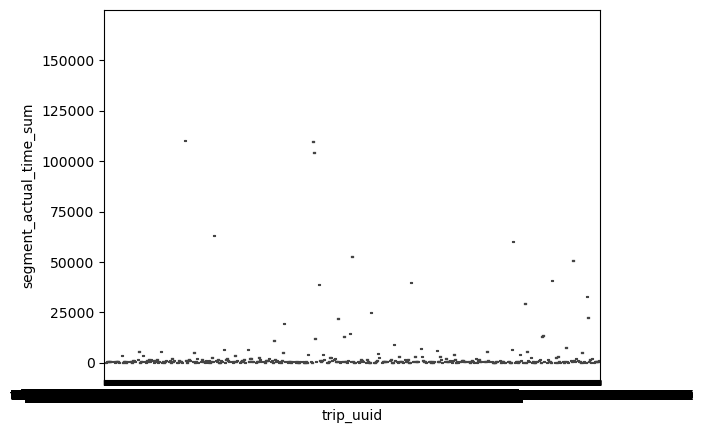

In [199]:
# we're plotting a boxplot between trip_uuid and segment_actual_time_sum
sns.boxplot(x='trip_uuid',y = 'segment_actual_time_sum',data = trip_summary)

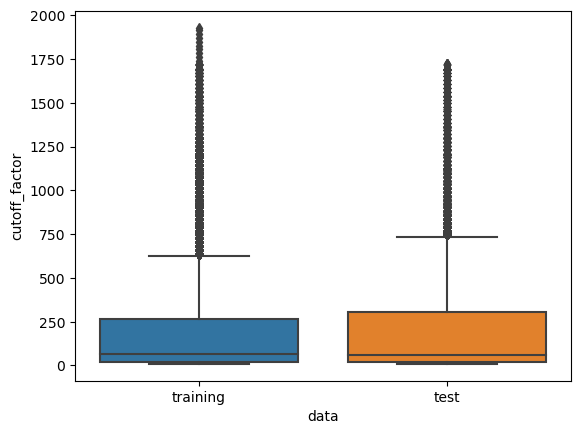

In [25]:
# we're plotting a boxplot between the categorical column data and numerical column cutoff_factor
sns.boxplot(x = 'data' , y ='cutoff_factor', data = data)
plt.show()

#### Outlier Detection and Treatment

In [26]:
# We're calculate the IQR
Q1 = data['cutoff_factor'].quantile(0.25)
Q3 = data['cutoff_factor'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
# Defined a threshold for identifying outliers
threshold = 1.5

# Identify outliers based on the threshold
outliers = data[(data['cutoff_factor'] < (Q1 - threshold * IQR)) | (data['cutoff_factor'] > (Q3 + threshold * IQR))]
outliers.shape


264.0


(17246, 33)

In [27]:
# We're transforming the data into lognormal and then we'll check for the outliers on the transformed data.
data['log_transformed'] = np.log1p(data['cutoff_factor'])
data

data         trip_creation_time  \
0       training 2018-09-22 01:43:50.600327   
1       training 2018-09-22 01:43:50.600327   
2       training 2018-09-22 01:43:50.600327   
3       training 2018-09-22 01:43:50.600327   
4       training 2018-09-22 01:43:50.600327   
...          ...                        ...   
144862      test 2018-10-02 23:27:39.400247   
144863      test 2018-10-02 23:27:39.400247   
144864      test 2018-10-02 23:27:39.400247   
144865      test 2018-10-02 23:27:39.400247   
144866      test 2018-10-02 23:27:39.400247   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
1       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
2       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
3       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
4       thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
...                                                   ...        ...   
144862  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144863  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144864  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144865  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   
144866  thanos::sroute:8b3f10bb-0273-41a2-87b2-856719c...        FTL   

                      trip_uuid source_center  \
0       trip-153758063060000193  IND360510AAB   
1       trip-153758063060000193  IND360510AAB   
2       trip-153758063060000193  IND360510AAB   
3       trip-153758063060000193  IND360530AAB   
4       trip-153758063060000193  IND360530AAB   
...                         ...           ...   
144862  trip-153852285939999912  IND262701AAA   
144863  trip-153852285939999912  IND262701AAA   
144864  trip-153852285939999912  IND262802AAA   
144865  trip-153852285939999912  IND262802AAA   
144866  trip-153852285939999912  IND262802AAA   

                               source_name destination_center  \
0             Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
1             Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
2             Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
3             Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
4             Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
...                                    ...                ...   
144862  Lakhimpur_Maheva_D (Uttar Pradesh)       IND262802AAA   
144863  Lakhimpur_Maheva_D (Uttar Pradesh)       IND262802AAA   
144864     Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   
144865     Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   
144866     Gola_BkgnRoad_D (Uttar Pradesh)       IND262723AAB   

                             destination_name              od_start_time  ...  \
0                Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
1                Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
2                Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
3                      Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
4                      Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
...                                       ...                        ...  ...   
144862        Gola_BkgnRoad_D (Uttar Pradesh) 2018-10-03 10:19:45.969000  ...   
144863        Gola_BkgnRoad_D (Uttar Pradesh) 2018-10-03 10:19:45.969000  ...   
144864  Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   
144865  Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   
144866  Dhaurahara_TahsilRD_D (Uttar Pradesh) 2018-10-03 11:48:35.320742  ...   

                            segment_key  segment_actual_time_sum  \
0       0000193IND360510AABIND360530AAB                     10.0   
1       0000193IND360510AABIND360530AAB                     20.0   
2       0000193IND360510AABIND36053

In [28]:
data[['log_transformed','cutoff_factor']]

log_transformed  cutoff_factor
0              2.302585              9
1              2.944439             18
2              3.218876             24
3              2.302585              9
4              2.944439             18
...                 ...            ...
144862         3.135494             22
144863         3.465736             31
144864         3.135494             22
144865         3.806662             44
144866         4.143135             62

[144867 rows x 2 columns]

In [29]:
# Calculating the IQR for transformed cutoff_factor column
Q1 = data['log_transformed'].quantile(0.25)
Q3 = data['log_transformed'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
# Define a threshold for identifying outliers
threshold = 1.5

# Identify outliers based on the threshold
outliers = data[(data['log_transformed'] < (Q1 - threshold * IQR)) | (data['log_transformed'] > (Q3 + threshold * IQR))]
outliers.shape
print(outliers)

2.5239879998304717
Empty DataFrame
Columns: [data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, is_cutoff, cutoff_factor, cutoff_timestamp, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor, segment_key, segment_actual_time_sum, segment_osrm_distance_sum, segment_osrm_time_sum, od_time_diff_hour, trip_creation_year, trip_creation_month, trip_creation_day, trip_creation_day_week, log_transformed]
Index: []

[0 rows x 34 columns]


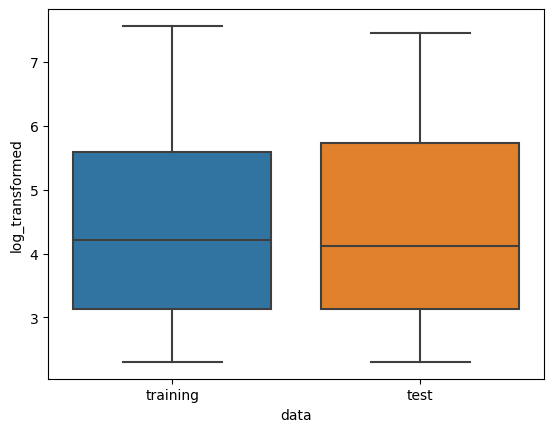

In [30]:
# we're plotting a boxplot between the categorical column data and numerical column log_transformed
sns.boxplot(x = 'data' , y ='log_transformed', data = data)
plt.show()

#### From the above visualization we observe that there're no outliers post converting the cutoff_factor to its log normal

In [31]:
data.head()

data         trip_creation_time  \
0  training 2018-09-22 01:43:50.600327   
1  training 2018-09-22 01:43:50.600327   
2  training 2018-09-22 01:43:50.600327   
3  training 2018-09-22 01:43:50.600327   
4  training 2018-09-22 01:43:50.600327   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
1  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
2  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
3  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
4  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   

                 trip_uuid source_center                   source_name  \
0  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
1  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
2  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
3  trip-153758063060000193  IND360530AAB  Jamjodhpur_Court_D (Gujarat)   
4  trip-153758063060000193  IND360530AAB  Jamjodhpur_Court_D (Gujarat)   

  destination_center              destination_name              od_start_time  \
0       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
1       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
2       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
3       IND362001AAA        Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149   
4       IND362001AAA        Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149   

   ...                      segment_key  segment_actual_time_sum  \
0  ...  0000193IND360510AABIND360530AAB                     10.0   
1  ...  0000193IND360510AABIND360530AAB                     20.0   
2  ...  0000193IND360510AABIND360530AAB                     29.0   
3  ...  0000193IND360530AABIND362001AAA                     10.0   
4  ...  0000193IND360530AABIND362001AAA                     21.0   

   segment_osrm_distance_sum  segment_osrm_time_sum      od_time_diff_hour  \
0                     9.9597                    9.0 0 days 00:48:16.082991   
1                    23.2323                   21.0 0 days 00:48:16.082991   
2                    26.7413                   24.0 0 days 00:48:16.082991   
3                    10.6190                    8.0 0 days 02:12:45.027548   
4                    20.7769                   17.0 0 days 02:12:45.027548   

   trip_creation_year  trip_creation_month  trip_creation_day  \
0                2018                    9                 22   
1                2018                    9                 22   
2                2018                    9                 22   
3                2018                    9                 22   
4                2018                    9                 22   

   trip_creation_day_week  log_transformed  
0                Saturday         2.302585  
1                Saturday         2.944439  
2                Saturday         3.218876  
3                Saturday         2.302585  
4                Saturday         2.944439  

[5 rows x 34 columns]

In [32]:
cat_cols

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'cutoff_timestamp']

In [33]:
#calculating the total null values / missing values across the columns
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
segment_key                         0
segment_actual_time_sum             0
segment_osrm

#### We observe that only source_name and destination_name columns having the null values so will do the one hot encoding to fill the null values with the most frequent observed value from respective columns

In [34]:
data[['source_name','destination_name']] = SimpleImputer(strategy='most_frequent').fit_transform(data[['source_name','destination_name']])

In [35]:
data.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
segment_key                       0
segment_actual_time_sum           0
segment_osrm_distance_sum         0
segment_osrm_time_sum       

In [36]:
data['data'].value_counts()

data
training    104858
test         40009
Name: count, dtype: int64

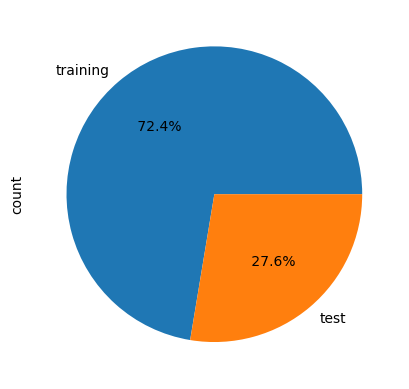

In [37]:
data['data'].value_counts().plot.pie(autopct='% 0.1f%%')
plt.show()

#### There are only two label for the column data so we'll do a Label Encoding and convert the column to a numerical column with label [0,1]

In [38]:
label_encoder = LabelEncoder()
data['data']=label_encoder.fit_transform(data['data'])
data['data'].value_counts()

data
1    104858
0     40009
Name: count, dtype: int64

In [39]:
data.head(-100000)

data         trip_creation_time  \
0         1 2018-09-22 01:43:50.600327   
1         1 2018-09-22 01:43:50.600327   
2         1 2018-09-22 01:43:50.600327   
3         1 2018-09-22 01:43:50.600327   
4         1 2018-09-22 01:43:50.600327   
...     ...                        ...   
44862     0 2018-10-02 08:00:34.031434   
44863     0 2018-10-02 08:00:34.031434   
44864     0 2018-10-02 08:00:34.031434   
44865     1 2018-09-12 04:38:37.131555   
44866     1 2018-09-21 16:58:07.831406   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
1      thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
2      thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
3      thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
4      thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
...                                                  ...        ...   
44862  thanos::sroute:4392d930-ea5e-44de-aac8-df06da0...        FTL   
44863  thanos::sroute:4392d930-ea5e-44de-aac8-df06da0...        FTL   
44864  thanos::sroute:4392d930-ea5e-44de-aac8-df06da0...        FTL   
44865  thanos::sroute:da7a7483-2cdb-4c1b-bee9-55926e5...    Carting   
44866  thanos::sroute:231d6c66-0b75-4aff-8975-bf26122...    Carting   

                     trip_uuid source_center  \
0      trip-153758063060000193  IND360510AAB   
1      trip-153758063060000193  IND360510AAB   
2      trip-153758063060000193  IND360510AAB   
3      trip-153758063060000193  IND360530AAB   
4      trip-153758063060000193  IND360530AAB   
...                        ...           ...   
44862  trip-153846723403115822  IND144001AAB   
44863  trip-153846723403115822  IND144001AAB   
44864  trip-153846723403115822  IND144001AAB   
44865  trip-153672711713116348  IND421302AAR   
44866  trip-153754908783116362  IND501359AAE   

                            source_name destination_center  \
0          Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
1          Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
2          Bhanvad_Mainroad_D (Gujarat)       IND360530AAB   
3          Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
4          Jamjodhpur_Court_D (Gujarat)       IND362001AAA   
...                                 ...                ...   
44862            Jalandhar_DPC (Punjab)       IND000000ACA   
44863            Jalandhar_DPC (Punjab)       IND000000ACA   
44864            Jalandhar_DPC (Punjab)       IND000000ACA   
44865    Mumbai_East_I_21 (Maharashtra)       IND400612AAA   
44866  Hyderabad_Shamshbd_H (Telangana)       IND500010AAB   

                     destination_name              od_start_time  ...  \
0        Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
1        Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
2        Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158  ...   
3              Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
4              Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149  ...   
...                               ...                        ...  ...   
44862   Ludhiana_MilrGanj_HB (Punjab) 2018-10-03 01:35:39.829685  ...   
44863   Ludhiana_MilrGanj_HB (Punjab) 2018-10-03 01:35:39.829685  ...   
44864   Ludhiana_MilrGanj_HB (Punjab) 2018-10-03 01:35:39.829685  ...   
44865  Mumbai_Mumbra_DC (Maharashtra) 2018-09-12 04:38:37.131555  ...   
44866   Hyderabad_Alwal_L (Telangana) 2018-09-21 16:58:07.831406  ...   

                           segment_key  segment_actual_time_sum  \
0      0000193IND360510AABIND360530AAB                     10.0   
1      0000193IND360510AABIND360530AAB                     20.0   
2      0000193IND360510AABIND360530AAB                     29.0   
3      0000193IND360530AABIND362001AAA                     10.0   
4      0000193IND360530AABIND362001AAA                     21.0   
...                                ...          

#### We'll standardize the numerical feature using Standard Scaler 

In [40]:
scaler = StandardScaler()
# we're standardizing the column cutoff_factor and storing it in cutoff_fact_standard
data['cutoff_fact_standard'] = scaler.fit_transform(pd.DataFrame(data['cutoff_factor']))
data['cutoff_fact_standard']

0        -0.649525
1        -0.623419
2        -0.606016
3        -0.649525
4        -0.623419
            ...   
144862   -0.611817
144863   -0.585711
144864   -0.611817
144865   -0.548003
144866   -0.495792
Name: cutoff_fact_standard, Length: 144867, dtype: float64

In [41]:
data.head()

data         trip_creation_time  \
0     1 2018-09-22 01:43:50.600327   
1     1 2018-09-22 01:43:50.600327   
2     1 2018-09-22 01:43:50.600327   
3     1 2018-09-22 01:43:50.600327   
4     1 2018-09-22 01:43:50.600327   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
1  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
2  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
3  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   
4  thanos::sroute:4cbbbb1f-cc23-4664-8360-5a14f33...    Carting   

                 trip_uuid source_center                   source_name  \
0  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
1  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
2  trip-153758063060000193  IND360510AAB  Bhanvad_Mainroad_D (Gujarat)   
3  trip-153758063060000193  IND360530AAB  Jamjodhpur_Court_D (Gujarat)   
4  trip-153758063060000193  IND360530AAB  Jamjodhpur_Court_D (Gujarat)   

  destination_center              destination_name              od_start_time  \
0       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
1       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
2       IND360530AAB  Jamjodhpur_Court_D (Gujarat) 2018-09-22 05:42:00.425158   
3       IND362001AAA        Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149   
4       IND362001AAA        Junagadh_DPC (Gujarat) 2018-09-22 06:30:16.508149   

   ... segment_actual_time_sum  segment_osrm_distance_sum  \
0  ...                    10.0                     9.9597   
1  ...                    20.0                    23.2323   
2  ...                    29.0                    26.7413   
3  ...                    10.0                    10.6190   
4  ...                    21.0                    20.7769   

   segment_osrm_time_sum      od_time_diff_hour trip_creation_year  \
0                    9.0 0 days 00:48:16.082991               2018   
1                   21.0 0 days 00:48:16.082991               2018   
2                   24.0 0 days 00:48:16.082991               2018   
3                    8.0 0 days 02:12:45.027548               2018   
4                   17.0 0 days 02:12:45.027548               2018   

   trip_creation_month  trip_creation_day  trip_creation_day_week  \
0                    9                 22                Saturday   
1                    9                 22                Saturday   
2                    9                 22                Saturday   
3                    9                 22                Saturday   
4                    9                 22                Saturday   

   log_transformed  cutoff_fact_standard  
0         2.302585             -0.649525  
1         2.944439             -0.623419  
2         3.218876             -0.606016  
3         2.302585             -0.649525  
4         2.944439             -0.623419  

[5 rows x 35 columns]

In [42]:
trip_summary

trip_uuid  segment_actual_time_sum  \
0      trip-153671041653548748                  15516.0   
1      trip-153671042288605164                    396.0   
2      trip-153671043369099517                 110876.0   
3      trip-153671046011330457                     82.0   
4      trip-153671052974046625                    555.0   
...                        ...                      ...   
14812  trip-153861095625827784                    184.0   
14813  trip-153861104386292051                     33.0   
14814  trip-153861106442901555                    548.0   
14815  trip-153861115439069069                    592.0   
14816  trip-153861118270144424                    349.0   

       segment_osrm_distance_sum  segment_osrm_time_sum  \
0                     14222.1104                10670.0   
1                       268.5094                  199.0   
2                     90479.7151                70971.0   
3                        31.8441                   25.0   
4                       266.2915                  204.0   
...                          ...                    ...   
14812                   154.3394                  148.0   
14813                    26.5334                   18.0   
14814                   249.4333                  202.0   
14815                   520.5464                  497.0   
14816                   127.8020                  105.0   

       actual_distance_to_destination  start_scan_to_end_scan   osrm_time  \
0                           34.015100                  1260.0  199.666667   
1                            9.357635                    58.0   23.333333   
2                           24.680127                   834.0  738.966292   
3                           11.354374                   100.0   12.000000   
4                           22.342846                   152.0   29.571429   
...                               ...                     ...         ...   
14812                        9.226182                   152.0   21.142857   
14813                        9.616856                    60.0    9.500000   
14814                        9.257110                   248.0   22.333333   
14815                        9.107838                   105.0   26.235294   
14816                       22.000767                   287.0   26.500000   

       actual_time  segment_actual_time  osrm_distance  segment_osrm_distance  \
0       402.102564            39.692308     271.224736              33.858290   
1        44.333333            15.666667      29.936756               9.354378   
2      1260.955056            37.168539    1005.025267              28.598515   
3        41.000000            29.500000      15.823750               9.938300   
4        79.428571            48.571429      38.041629              20.970271   
...            ...                  ...            ...                    ...   
14812    26.571429            11.714286      23.278186               9.265014   
14813    16.500000            10.500000      13.266650               8.044150   
14814    91.500000            46.833333      27.141650              17.481100   
14815    35.294118            15.176471      26.443429              13.148965   
14816    87.500000            68.500000      31.950500              20.144675   

       segment_osrm_time                         source_name  \
0              25.846154  Bhopal_Trnsport_H (Madhya Pradesh)   
1               7.222222       Tumkur_Veersagr_I (Karnataka)   
2              21.808989    Bangalore_Nelmngla_H (Karnataka)   
3               8.000000            Mumbai Hub (Maharashtra)   
4              16.428571                  Hospet (Karnataka)   
...                  ...                                 ...   
14812           8.857143  Chandigarh_Raiprkln_C (Chandigarh)   
14813           5.500000        FBD_Balabhgarh_DPC (Haryana)   
14814          14.666667  Kanpur_Central_H_6 (Uttar Pradesh)   
14815          13.000000        Eral_Busstand_D (Tamil Nadu)   
1

#### We'll perform hypothesis testing on the numerical columns. 
#### Null Hypothesis : There is no significant difference and are dependent.
#### Alternate Hypothesis : They are significantly different and are independent.

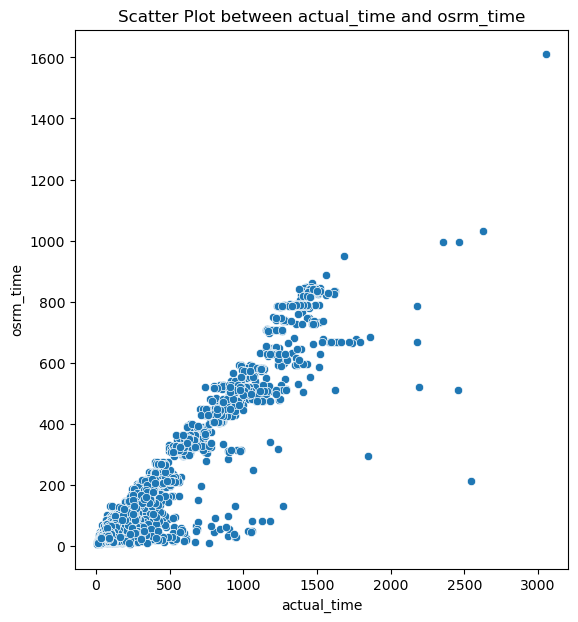

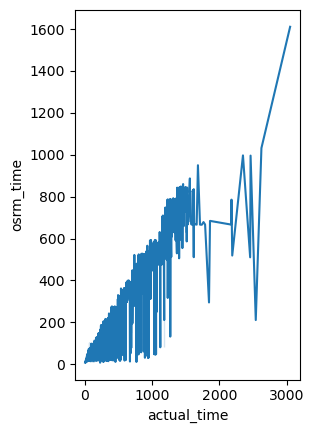

In [60]:
# Analysis between actual_time Vs osrm_time
# we're setting the figure size
plt.figure(figsize=(14,7))

# we're creating a subplot so as to show the subsequent plots in the same figure
plt.subplot(1,2,1)
# Adding the title to figure
sns.scatterplot(x ='actual_time',y= 'osrm_time',data=trip_summary)
plt.title('Scatter Plot between actual_time and osrm_time')
plt.show()

# we're creating a subplot and positioning it at position 2
plt.subplot(1,2,2)
# plotting a lineplot between actual_time and osrm_time
sns.lineplot(x ='actual_time',y= 'osrm_time',data=trip_summary)

plt.show()

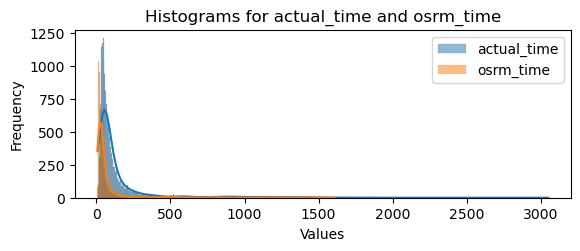

In [61]:
# Plotting histogram and kde plot between actual_time and osrm_time
sns.histplot(trip_summary['actual_time'], kde=True, label='actual_time')
sns.histplot(trip_summary['osrm_time'], kde=True, label='osrm_time')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms for actual_time and osrm_time')
plt.legend()
plt.show()

In [43]:
# We're setting the aplha value to 0.05.
alpha = 0.005
t_stat, p_value = ttest_ind(trip_summary['actual_time'], trip_summary['osrm_time'])
print(p_value)
if p_value < alpha:
    print("Null Hypothesis is rejected ,they are significantly different and are independent")
else:
    print("We continue to believe the Null hypothesis that they're dependent")

9.956158266747086e-262
Null Hypothesis is rejected ,they are significantly different and are independent


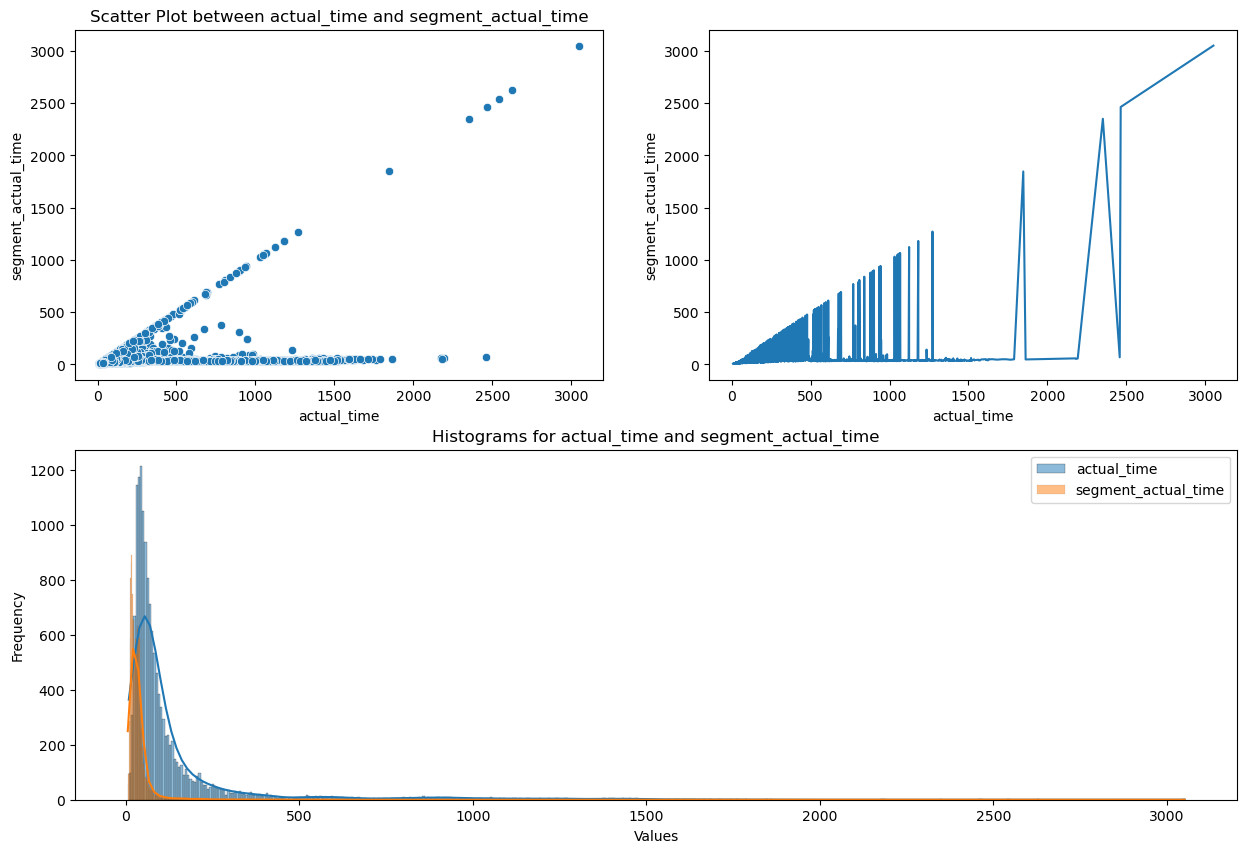

In [95]:
# Analysis between actual_time Vs segment_actual_time
# we're setting the figure size
plt.figure(figsize=(15,10))

# we're creating a subplot so as to show the subsequent plots in the same figure
plt.subplot(2,2,1)
# Adding the title to figure
sns.scatterplot(x ='actual_time',y= 'segment_actual_time',data=trip_summary)
plt.title('Scatter Plot between actual_time and segment_actual_time')

# we're creating a subplot and positioning it at position 2
plt.subplot(2,2,2)
# Adding the title to figure
sns.lineplot(x ='actual_time',y= 'segment_actual_time',data=trip_summary)

plt.subplot(2,1,2)
sns.histplot(trip_summary['actual_time'], kde=True, label='actual_time')
sns.histplot(trip_summary['segment_actual_time'], kde=True, label='segment_actual_time')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms for actual_time and segment_actual_time')
plt.legend()

plt.show()

In [44]:
t_stat, p_value = ttest_ind(trip_summary['actual_time'], trip_summary['segment_actual_time'])
if p_value < alpha:
    print("Null Hypothesis is rejected ,they are significantly different and are independent")
else:
    print("We continue to believe the Null hypothesis that they're dependent")

Null Hypothesis is rejected ,they are significantly different and are independent


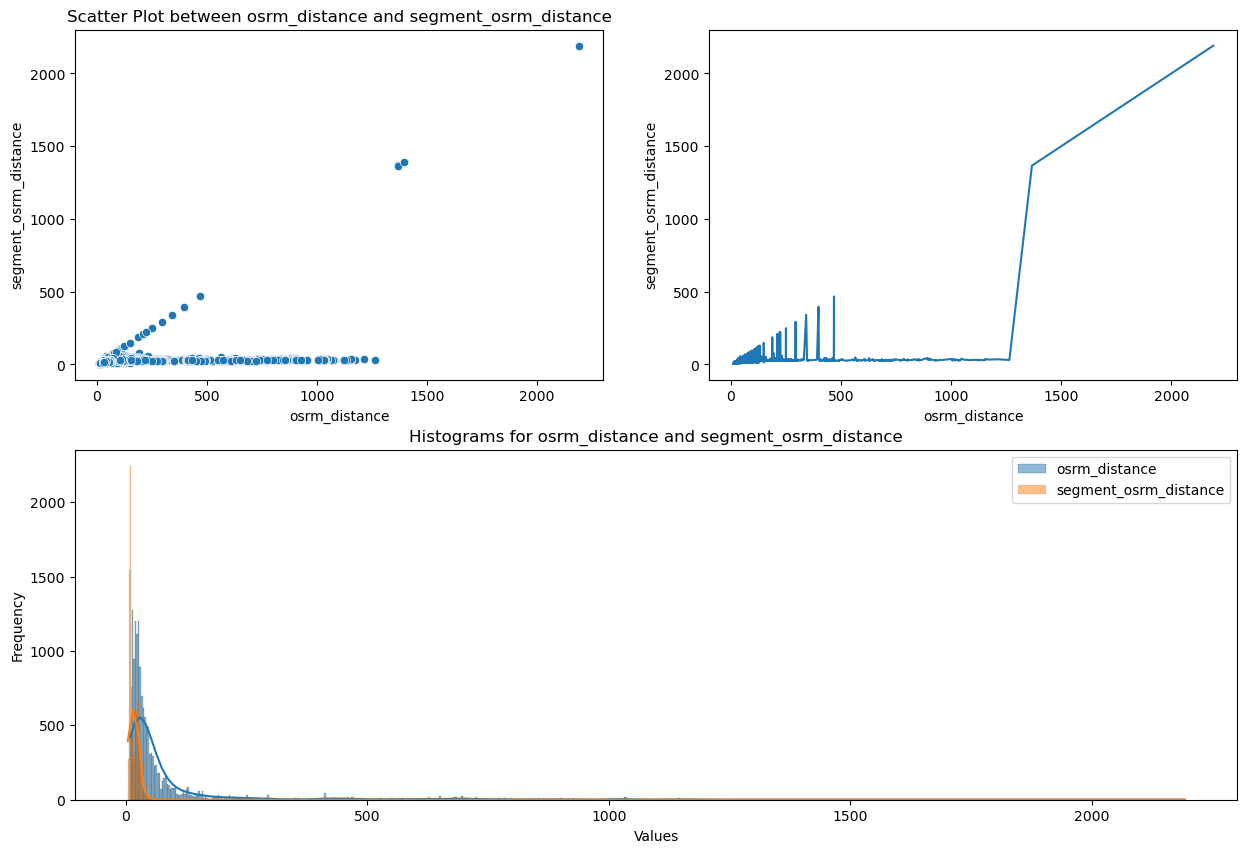

In [97]:
# Analysis between osrm_distance Vs segment_osrm_distance
# we're setting the figure size
plt.figure(figsize=(15,10))

# we're creating a subplot so as to show the subsequent plots in the same figure
plt.subplot(2,2,1)
# Adding the title to figure
sns.scatterplot(x ='osrm_distance',y= 'segment_osrm_distance',data=trip_summary)
plt.title('Scatter Plot between osrm_distance and segment_osrm_distance')

# we're creating a subplot and positioning it at position 2
plt.subplot(2,2,2)
# Adding the title to figure
sns.lineplot(x ='osrm_distance',y= 'segment_osrm_distance',data=trip_summary)

plt.subplot(2,1,2)
sns.histplot(trip_summary['osrm_distance'], kde=True, label='osrm_distance')
sns.histplot(trip_summary['segment_osrm_distance'], kde=True, label='segment_osrm_distance')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms for osrm_distance and segment_osrm_distance')
plt.legend()

plt.show()

In [45]:
t_stat, p_value = ttest_ind(trip_summary['osrm_distance'], trip_summary['segment_osrm_distance'])
if p_value < alpha:
    print("Null Hypothesis is rejected ,they are significantly different and are independent")
else:
    print("We continue to believe the Null hypothesis that they're dependent")

Null Hypothesis is rejected ,they are significantly different and are independent


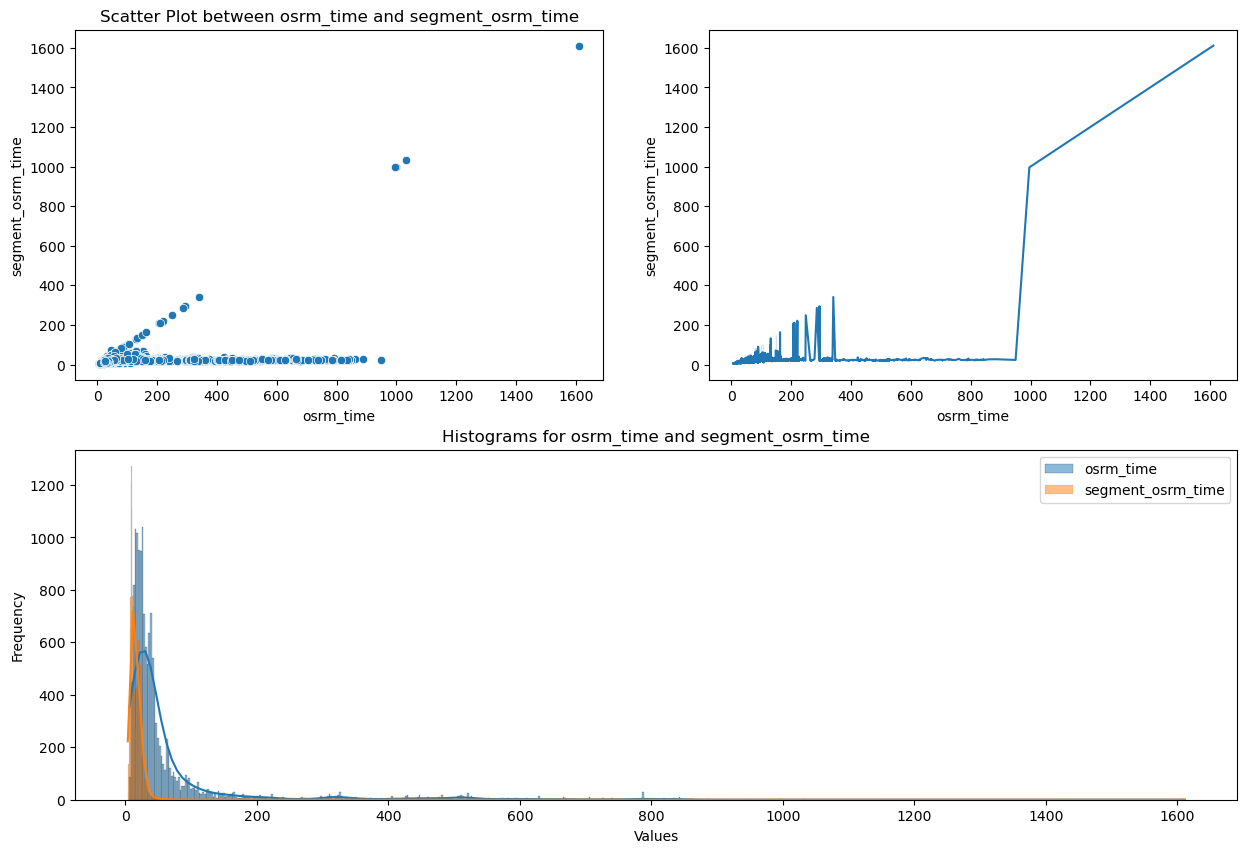

In [107]:
# Analysis between osrm_time Vs segment_osrm_time
# we're setting the figure size
plt.figure(figsize=(15,10))

# we're creating a subplot so as to show the subsequent plots in the same figure
plt.subplot(2,2,1)
# Adding the title to figure
sns.scatterplot(x ='osrm_time',y= 'segment_osrm_time',data=trip_summary)
plt.title('Scatter Plot between osrm_time and segment_osrm_time')

# we're creating a subplot and positioning it at position 2
plt.subplot(2,2,2)
# Adding the title to figure
sns.lineplot(x ='osrm_time',y= 'segment_osrm_time',data=trip_summary)

plt.subplot(2,1,2)
sns.histplot(trip_summary['osrm_time'], kde=True, label='osrm_time')
sns.histplot(trip_summary['segment_osrm_time'], kde=True, label='segment_osrm_time')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms for osrm_time and segment_osrm_time')
plt.legend()

plt.show()

In [46]:
t_stat, p_value = ttest_ind(trip_summary['osrm_time'], trip_summary['segment_osrm_time'])
if p_value < alpha:
    print("Null Hypothesis is rejected ,they are significantly different and are independent")
else:
    print("We continue to believe the Null hypothesis that they're dependent")

Null Hypothesis is rejected ,they are significantly different and are independent


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\nnave\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

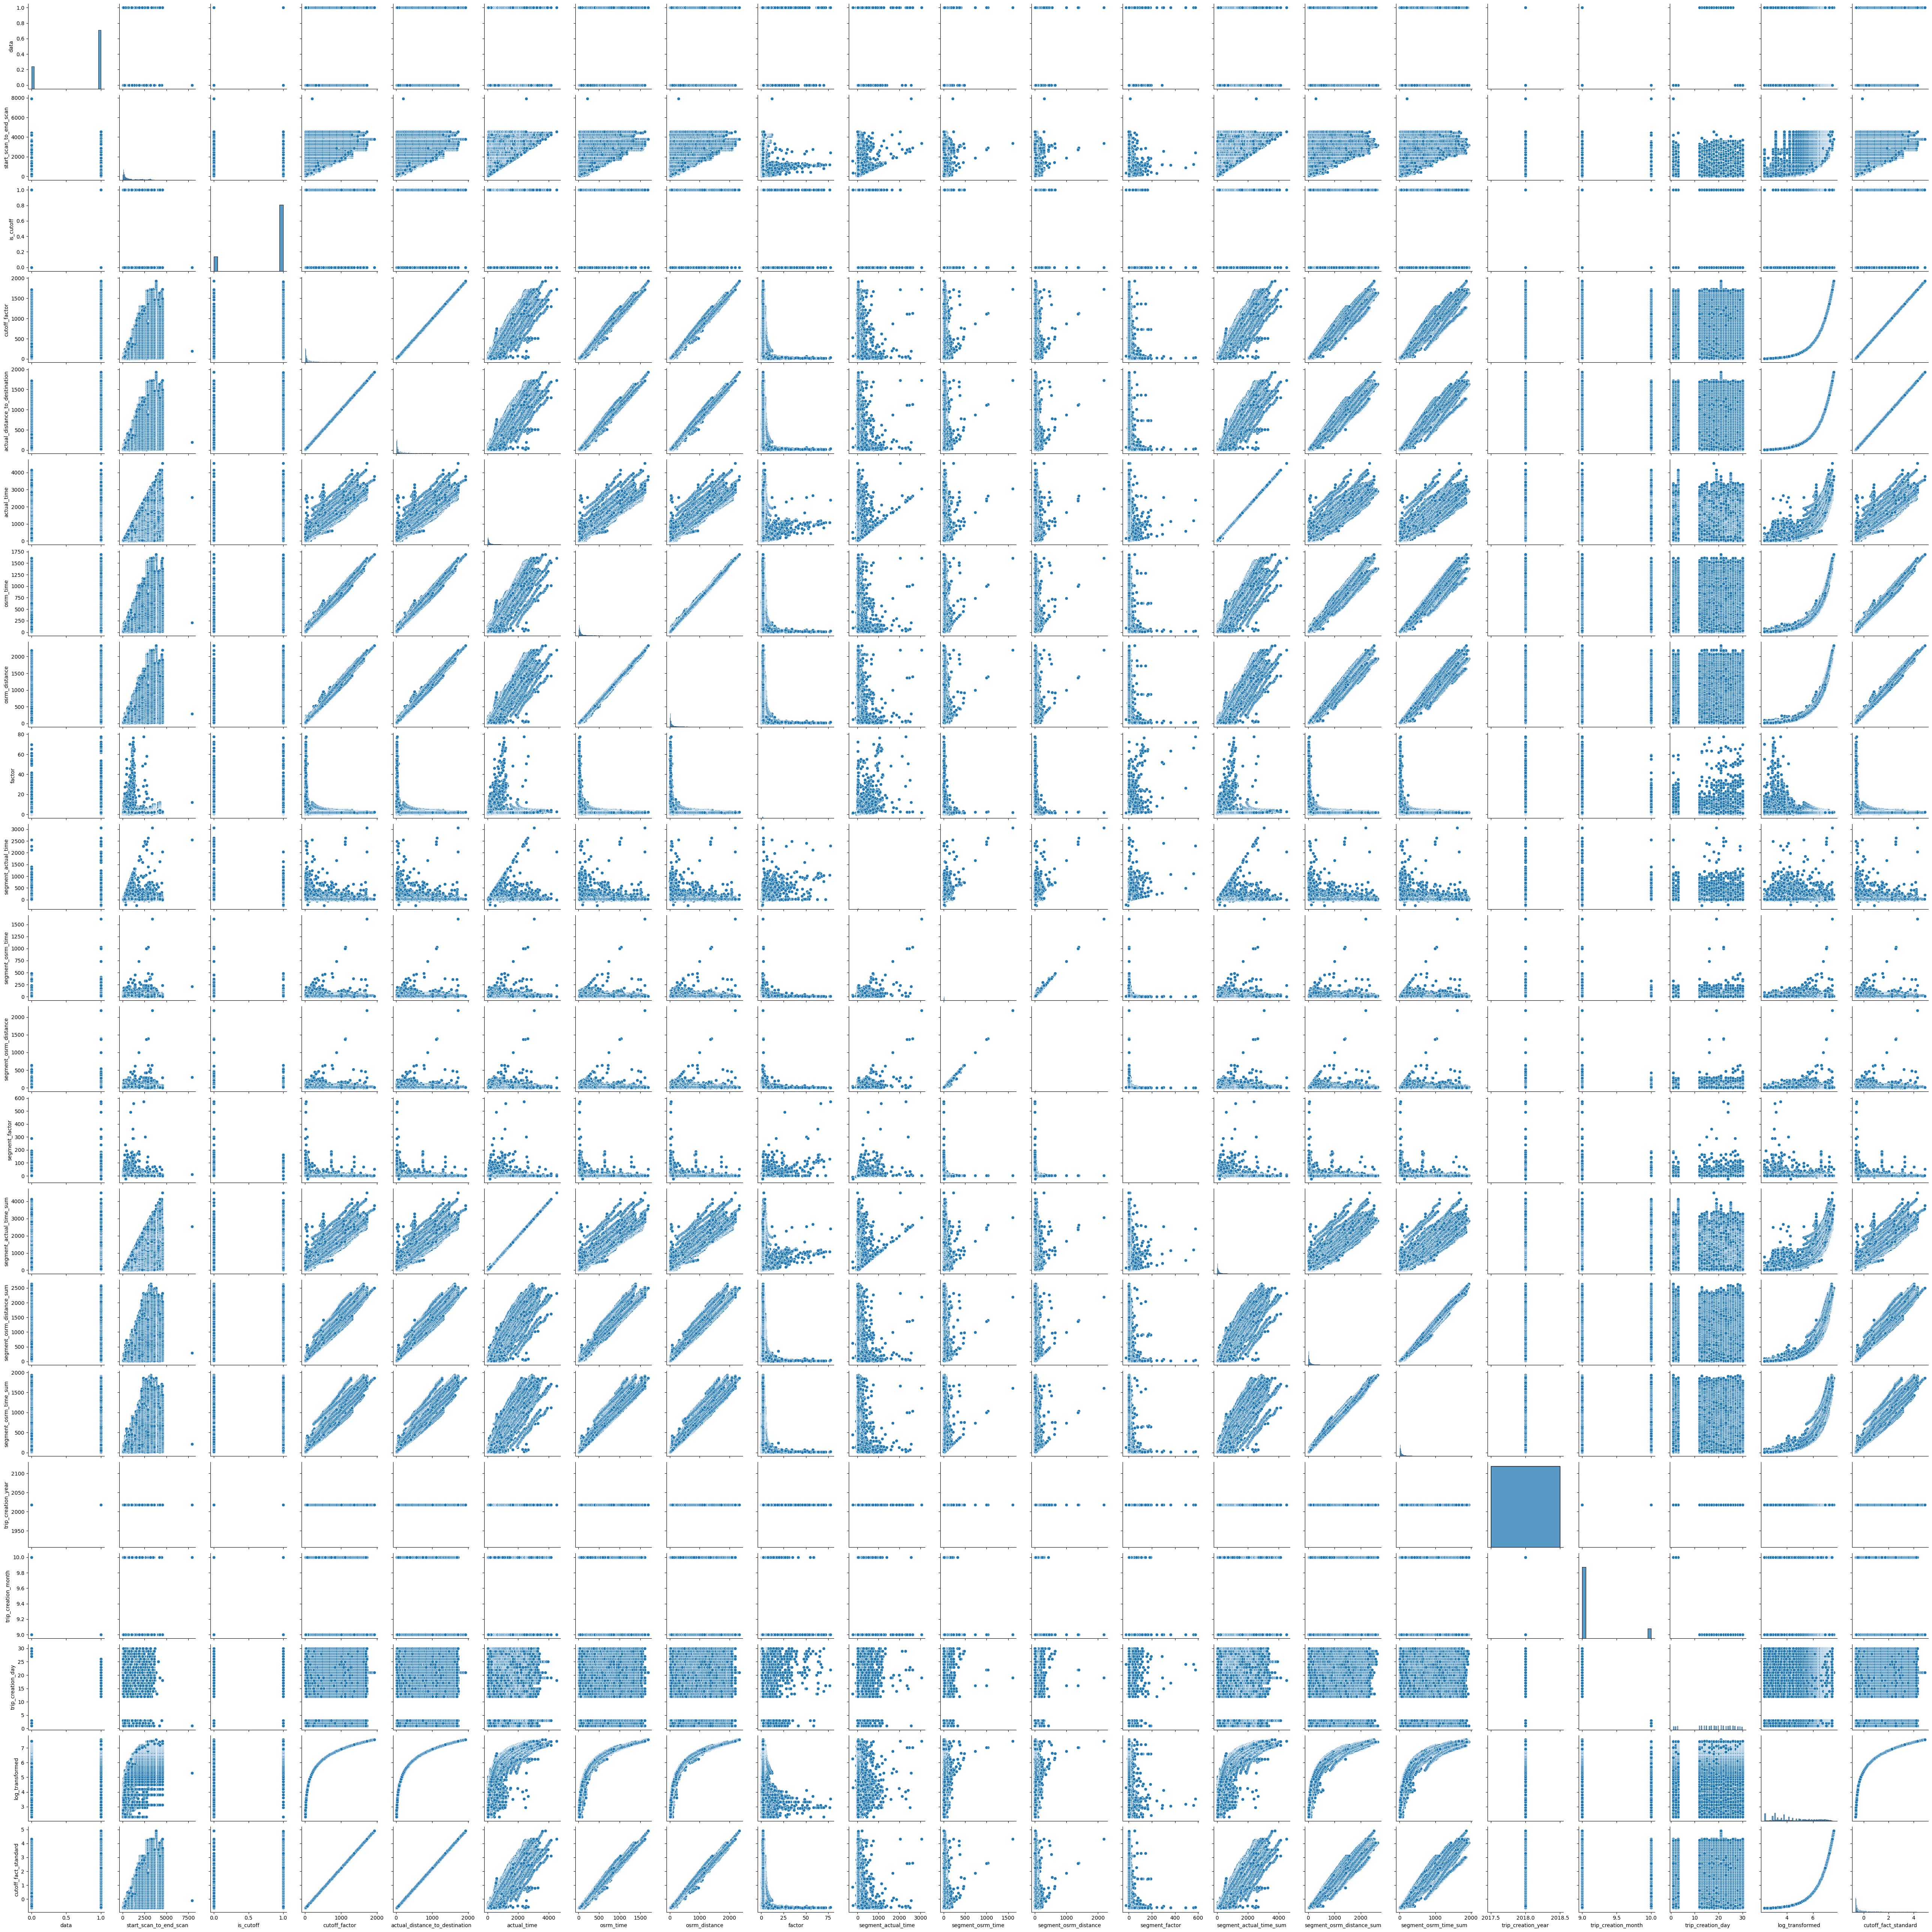

In [109]:
# we're plotting a pairplot to observe the corelation between the numerical/continuous value column.
# In the dataset we have only one numerical value column so the corelated value will be 1 as the plotting is done with itself
plt.figure(figsize=(12,8))
sns.pairplot(data=data)

In [47]:
# We're fetching the top 5 destination_name with respective value counts.
data['destination_name'].value_counts().head()

destination_name
Gurgaon_Bilaspur_HB (Haryana)        15453
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
Name: count, dtype: int64

In [48]:
# Fetching the record with maximun actual_distance_to_destination and maximum actual_time
trip_summary[(trip_summary['actual_distance_to_destination'] == trip_summary['actual_distance_to_destination'].max()) & 
(trip_summary['actual_time'] == trip_summary['actual_time'].max())][['trip_uuid','actual_distance_to_destination','actual_time','source_name',
                                                                   'destination_name' ]]

trip_uuid  actual_distance_to_destination  actual_time  \
5265  trip-153733174477629450                     1722.045544       3051.0   

                        source_name                 destination_name  
5265  Gurgaon_Bilaspur_HB (Haryana)  MAA_Poonamallee_HB (Tamil Nadu)

In [49]:
# Fetching the month in which maximum packages delivered.
data['trip_creation_month'].max()

10

In [50]:
# Fetching the day of the week with most deliveries.
data['trip_creation_day_week'].max()

'Wednesday'

#### Insights :

#### 1. The minimum time difference between od_end_time and od_start_time is 48 mins and maximum time difference is around 3hrs 39 mins.
#### 2. There total of 1499 places from which the orders being placed and orders being fulfilled from 14817 trips.
#### 3. From Bivariate analysis we identified that they're outliers for the data values training and test with cutoff_factor column. There are around 17246 outliers in the given dataset for the cutoff factor.
#### 4. We transformed the cutoff_factor column to its log normal and treated the outliers and post treatment we observe there are no outliers without losing the data.
#### 5. We performed the one hot encoding to fill the null values in two columns.
#### 6. We converted the data column with values training and test to numerical labels 0 and 1 using LabelEncoder.
#### 7. We performed the hypothesis testing and observed that the numerical columns are independent to each other and are significantly different.
#### 8. We performed few operation to identify the trip with maximum actual distance to destination and observed that trip-153733174477629450 is having 1722.04 distance and it was delivered from Gurgaon_Bilaspur_HB (Haryana) to MAA_Poonamallee_HB (Tamil Nadu).
#### 9. October is the month where most packages are delivered and wednesday being the most busiest day of the week.